In [41]:
import numpy as np
import pandas as pd
import scanpy as sc
#import celltypist
#import scvi
#from celltypist import models
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.pyplot import rc_context

sc.set_figure_params(dpi=100, color_map = 'viridis_r', transparent=False, frameon=False)
sc.settings.verbosity = 1
sc.logging.print_header()

version = '2023-05-16'

sc.settings.figdir = './scanpy/{}/graph'.format(version)
sc.settings.cachedir = './scanpy/{}/cache'.format(version)
%config InlineBackend.figure_format = 'retina'

# matplot 输出的图片为illustrator可编辑的字体
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.0 scipy==1.9.3 pandas==1.5.1 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.10.2 louvain==0.8.0 pynndescent==0.5.7


# Import Mono Data

In [23]:
adata_MC = sc.read('./write/MC_leiden.h5ad')
adata_MC.uns['log1p']["base"] = None
adata_MC

AnnData object with n_obs × n_vars = 33577 × 19590
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'Phenotype', 'donor_id', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'predicted_labels_NC2022', 'majority_voting_NC2022', 'predicted_labels_builtin', 'majority_voting_builtin', 'leiden', 'Major_cluster', 'Sample', 'Minor_cluster', 'Major_category'
    var: 'gene_ids', 'feature_types', 'genome', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'Major_category_colors', 'Major_cluster_colors', 'Minor_cluster_colors', 'Phenotype_colors', 'donor_id_colors', 'leiden', 'leiden_colors', 'log1p', 'majority_voting_NC2022_colors', 'majority_voting_builtin_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'counts', 'matrix', 'spli

In [31]:
adata_MC_M = adata_MC[adata_MC.obs['Major_category'] == 'M']
adata_MC_M3 = adata_MC[adata_MC.obs['Minor_cluster'] == 'Monocytes 3']

adata_MC_M_MC = adata_MC_M[adata_MC_M.obs['Phenotype'] == 'MG_crisis']
adata_MC_M_AC = adata_MC_M[adata_MC_M.obs['Phenotype'] == 'After_crisis']

meta NOT subset; don't know how to subset; dropped


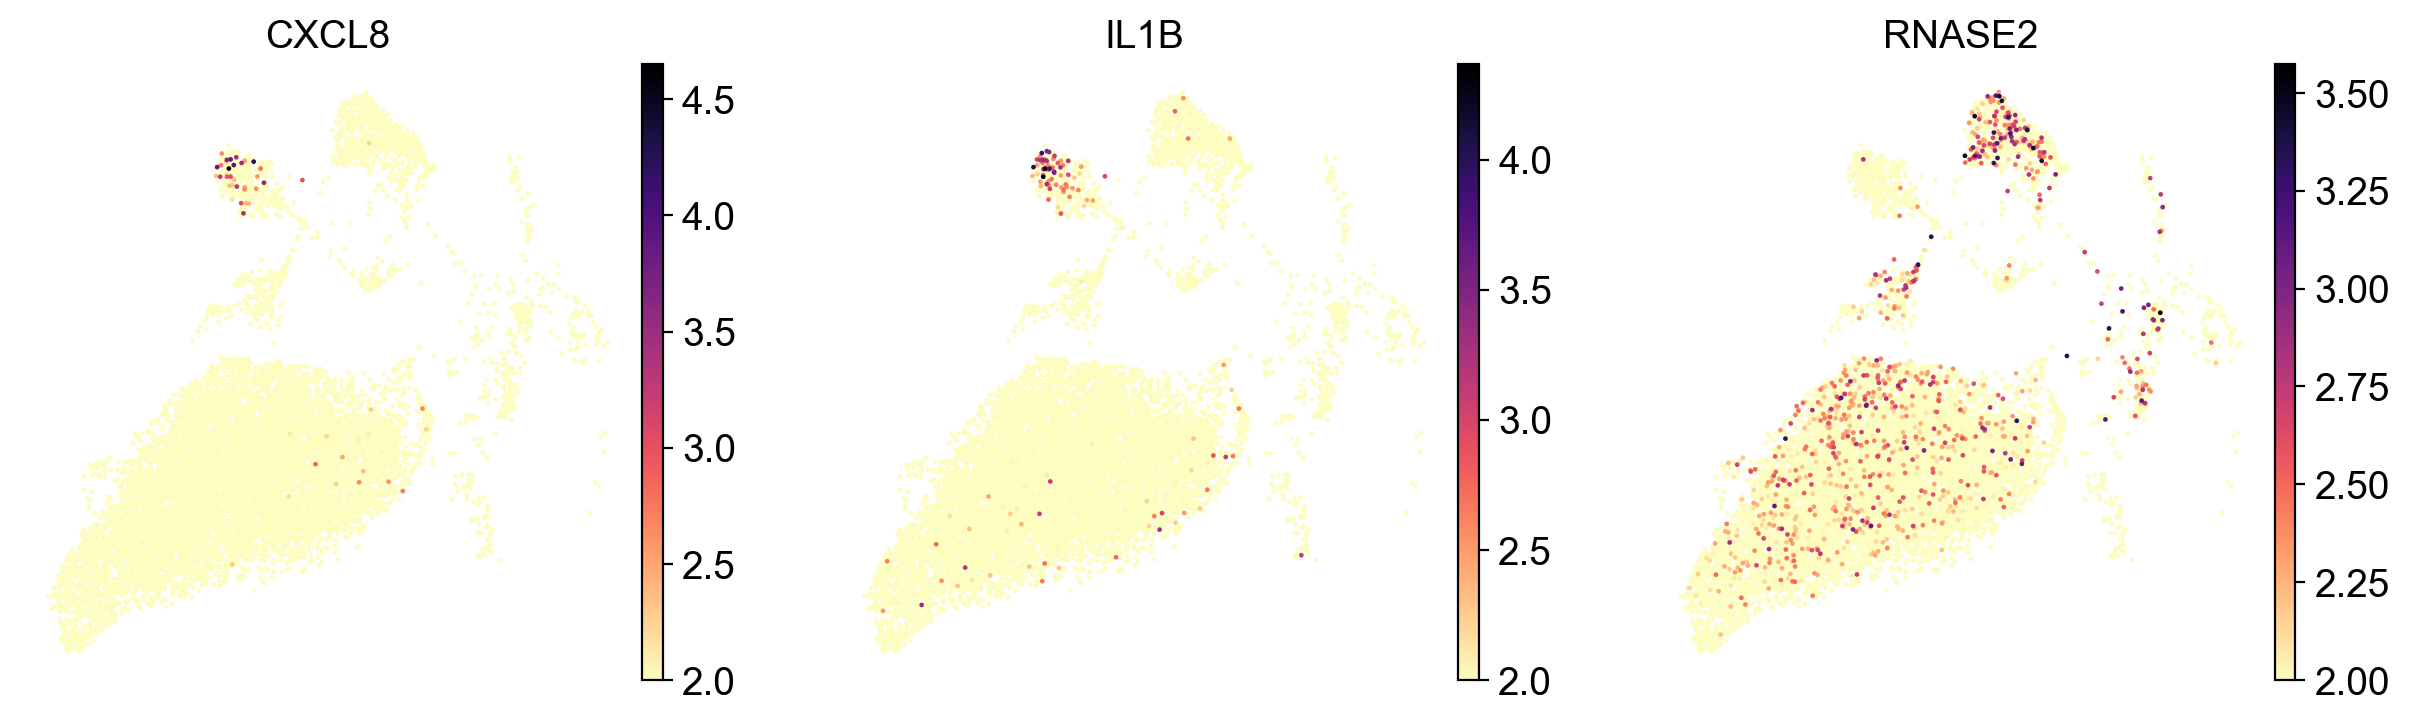

In [50]:
sc.set_figure_params(dpi=100, color_map = 'magma_r', transparent=False, frameon=False) #figsize= [8, 2], fontsize=6, viridis_r

sc.pl.umap(adata_MC_M_MC, color=['CXCL8','IL1B', 'RNASE2'], ncols=3,  save='huan minor' , legend_loc = 'on data', vmin= 2) #palette= 'tab20',

# Mono markers

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


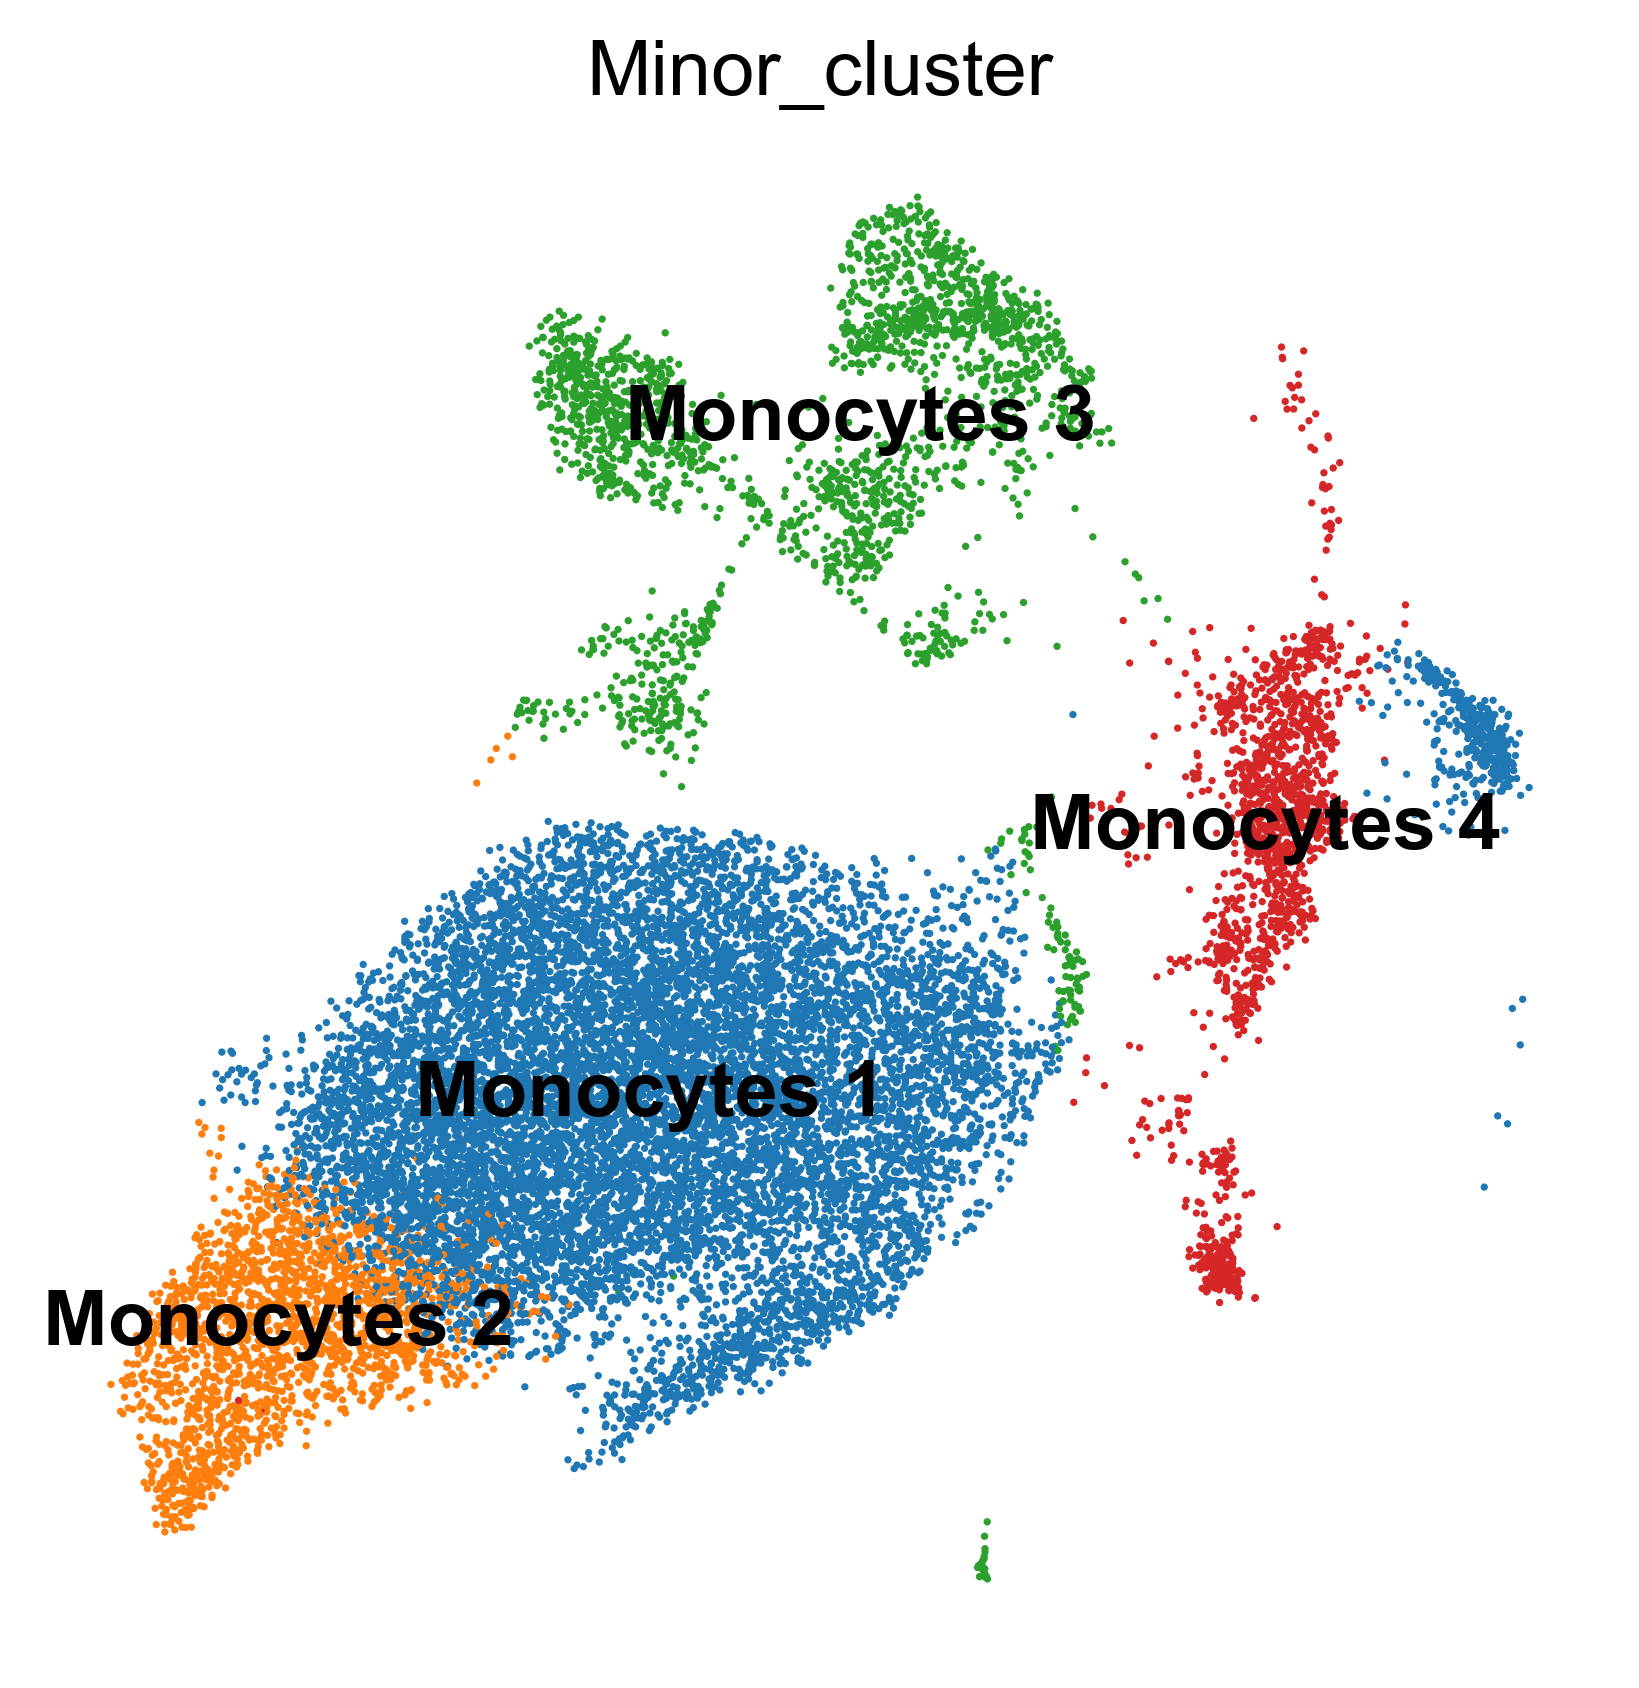

In [49]:
sc.set_figure_params(dpi=200, figsize= [5, 5], transparent=False, frameon=False) #figsize= [8, 2], fontsize=6, viridis_r

sc.pl.umap(adata_MC_M, color=['Minor_cluster'],  save='Mono Minor_cluster' , legend_loc = 'on data', vmin= 2, color_map= 'viridis',) #palette= 'tab20',

categories: Monocytes 1, Monocytes 2, Monocytes 3, etc.
var_group_labels: Monocytes, Monocytes 1, Monocytes 2, etc.


meta NOT subset; don't know how to subset; dropped


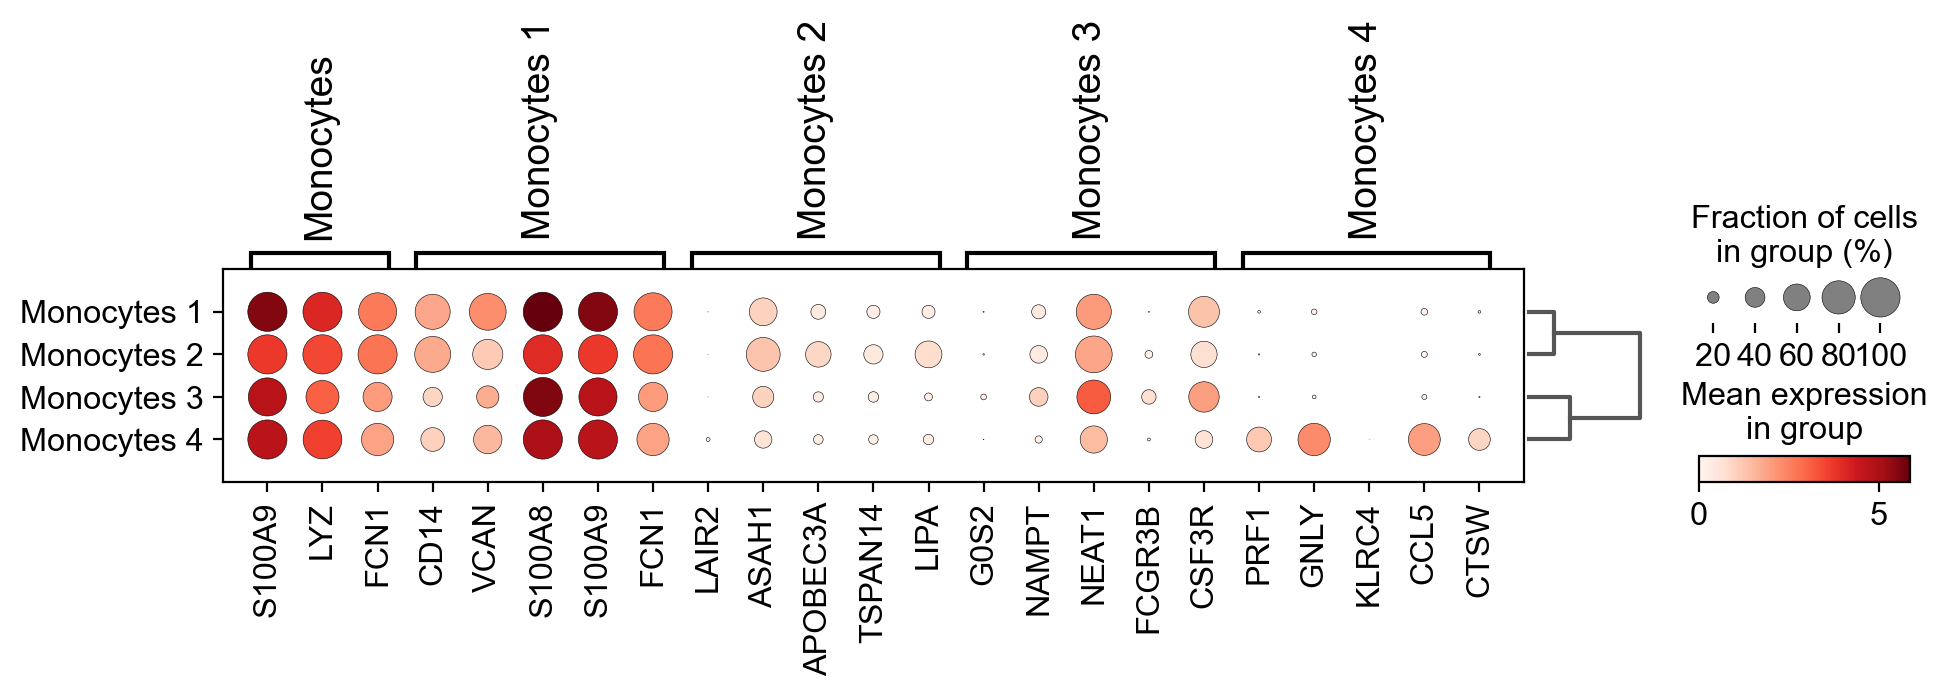

In [42]:
marker_genes_dict = {

    'Monocytes': ['S100A9', 'LYZ', 'FCN1'],
    'Monocytes 1': ['CD14', 'VCAN', 'S100A8', 'S100A9', 'FCN1'],
    'Monocytes 2': ['LAIR2', 'ASAH1', 'APOBEC3A', 'TSPAN14', 'LIPA'],
    'Monocytes 3': ['G0S2', 'NAMPT', 'NEAT1', 'FCGR3B', 'CSF3R'],
    'Monocytes 4': ['PRF1', 'GNLY', 'KLRC4', 'CCL5', 'CTSW'],
}

sc.pl.dotplot(adata_MC_M, marker_genes_dict, groupby='Minor_cluster', dendrogram=True,  save='_mono markers')

# Mono DEG

In [6]:
sc.tl.rank_genes_groups(adata_MC_M, 'Phenotype', method='wilcoxon', key_added = "wilcoxon")
Crisis_genes = sc.get.rank_genes_groups_df(adata_MC_M, group='MG_crisis', key='wilcoxon')
Crisis_genes = Crisis_genes[(Crisis_genes.pvals_adj < 0.05) & (abs(Crisis_genes.logfoldchanges) > 0.5)].sort_values(by=['logfoldchanges'], ascending=False).reset_index(drop=True)

Crisis_genes_up = Crisis_genes[(Crisis_genes.pvals_adj < 0.05) & (Crisis_genes.logfoldchanges > 0.5)].sort_values(by=['scores'], ascending=False).reset_index(drop=True)
Crisis_genes_down = Crisis_genes[(Crisis_genes.pvals_adj < 0.05) & (Crisis_genes.logfoldchanges < -0.5)].sort_values(by=['scores'], ascending=False).reset_index(drop=True)

glist_up = Crisis_genes_up['names'].squeeze().str.strip().tolist()
glist_down = Crisis_genes_down['names'].squeeze().str.strip().tolist()
glist_all = glist_up + glist_down

print(f'glist_up: {len(glist_up)}, glist_down: {len(glist_down)}, glist_all: {len(glist_all)}')

Crisis_genes.to_csv('./write/M_DEG_MC_vs_AC.csv', index=False)

c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


glist_up: 368, glist_down: 452, glist_all: 820


In [7]:
Crisis_genes

names     scores  logfoldchanges         pvals     pvals_adj
0    IGKV3-11  11.210637        9.531245  3.615822e-29  1.859159e-27
1    IGLV3-27   5.866414        7.613671  4.453217e-09  8.292636e-08
2    IGLV3-10   3.722172        7.184255  1.975161e-04  2.195993e-03
3    IGHV3-30   3.234608        5.134768  1.218098e-03  1.145585e-02
4      KCNMA1   3.152522        4.551587  1.618668e-03  1.484537e-02
..        ...        ...             ...           ...           ...
815     TRBV9  -2.740899       -3.963587  6.127134e-03  4.859536e-02
816    CRISP3  -3.683430       -3.990185  2.301160e-04  2.535418e-03
817     DEFA3 -16.998381       -4.255285  8.442072e-65  9.903005e-63
818      CD8A  -4.858552       -4.306456  1.182476e-06  1.776434e-05
819     PRTN3  -3.287504       -4.312869  1.010796e-03  9.673426e-03

[820 rows x 5 columns]

# Mono3 DEG

c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


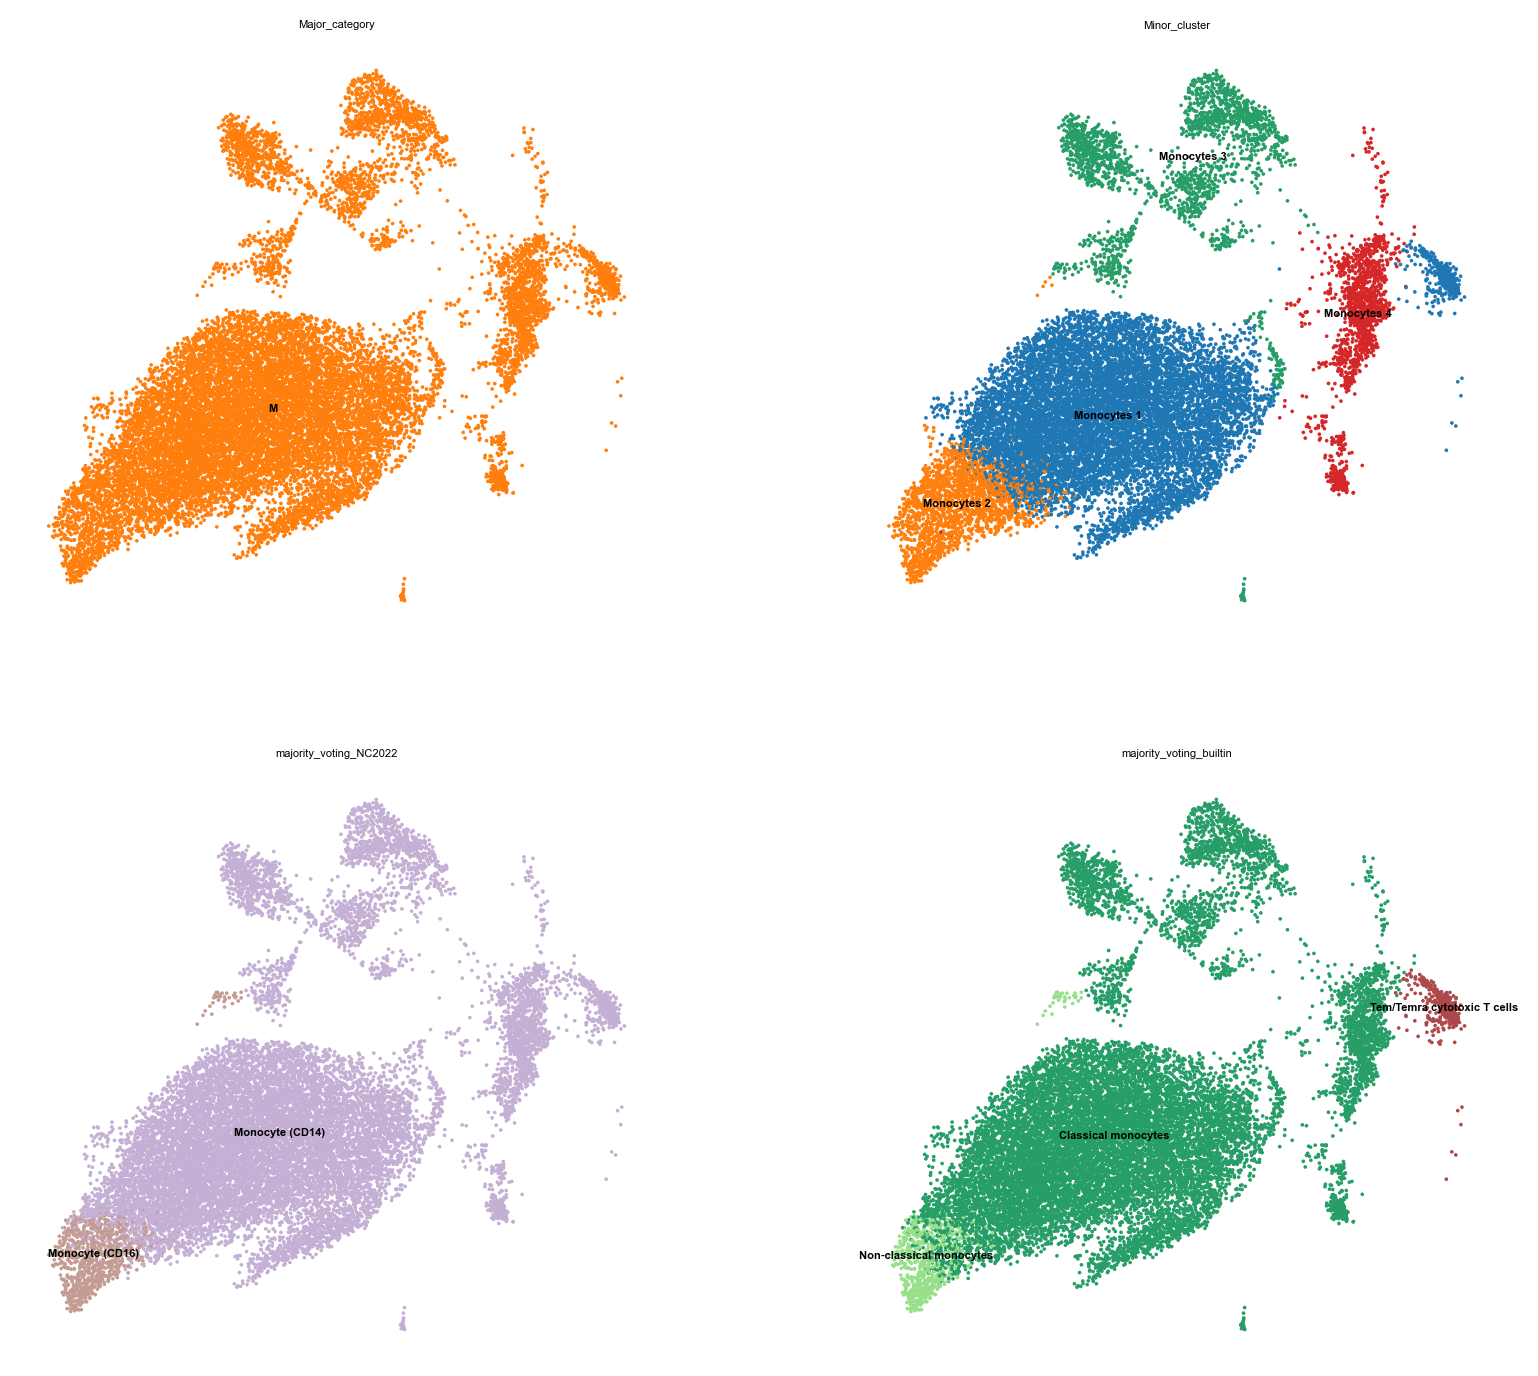

In [25]:
sc.set_figure_params(dpi=100, color_map = 'viridis_r', fontsize=4, transparent=True, frameon=False)

sc.pl.umap(adata_MC_M, color=['Major_category', 'Minor_cluster','majority_voting_NC2022', 'majority_voting_builtin'], legend_loc = 'on data', save='umap_leiden', ncols=2) 

In [26]:
sc.tl.rank_genes_groups(adata_MC_M3, 'Phenotype', method='wilcoxon', key_added = "wilcoxon")
Crisis_genes = sc.get.rank_genes_groups_df(adata_MC_M3, group='MG_crisis', key='wilcoxon')
Crisis_genes = Crisis_genes[(Crisis_genes.pvals_adj < 0.05) & (abs(Crisis_genes.logfoldchanges) > 0.5)].sort_values(by=['logfoldchanges'], ascending=False).reset_index(drop=True)

Crisis_genes_up = Crisis_genes[(Crisis_genes.pvals_adj < 0.05) & (Crisis_genes.logfoldchanges > 0.5)].sort_values(by=['scores'], ascending=False).reset_index(drop=True)
Crisis_genes_down = Crisis_genes[(Crisis_genes.pvals_adj < 0.05) & (Crisis_genes.logfoldchanges < -0.5)].sort_values(by=['scores'], ascending=False).reset_index(drop=True)

glist_up = Crisis_genes_up['names'].squeeze().str.strip().tolist()
glist_down = Crisis_genes_down['names'].squeeze().str.strip().tolist()
glist_all = glist_up + glist_down

print(f'glist_up: {len(glist_up)}, glist_down: {len(glist_down)}, glist_all: {len(glist_all)}')

Crisis_genes.to_csv('./write/M3_DEG_MC_vs_AC.csv', index=False)

c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


glist_up: 1722, glist_down: 185, glist_all: 1907


['ARCHS4_Cell-lines', 'ARCHS4_IDG_Coexp', 'ARCHS4_Kinases_Coexp', 'ARCHS4_TFs_Coexp', 'ARCHS4_Tissues', 'Achilles_fitness_decrease', 'Achilles_fitness_increase', 'Aging_Perturbations_from_GEO_down', 'Aging_Perturbations_from_GEO_up', 'Allen_Brain_Atlas_10x_scRNA_2021', 'Allen_Brain_Atlas_down', 'Allen_Brain_Atlas_up', 'Azimuth_Cell_Types_2021', 'BioCarta_2013', 'BioCarta_2015', 'BioCarta_2016', 'BioPlanet_2019', 'BioPlex_2017', 'CCLE_Proteomics_2020', 'CORUM', 'COVID-19_Related_Gene_Sets', 'COVID-19_Related_Gene_Sets_2021', 'Cancer_Cell_Line_Encyclopedia', 'CellMarker_Augmented_2021', 'ChEA_2013', 'ChEA_2015', 'ChEA_2016', 'ChEA_2022', 'Chromosome_Location', 'Chromosome_Location_hg19', 'ClinVar_2019', 'DSigDB', 'Data_Acquisition_Method_Most_Popular_Genes', 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019', 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019', 'Descartes_Cell_Types_and_Tissue_2021', 'Diabetes_Perturbations_GEO_2022', 'DisGeNET', 'Disease_Perturbations_from_GEO_down', 'Disease

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


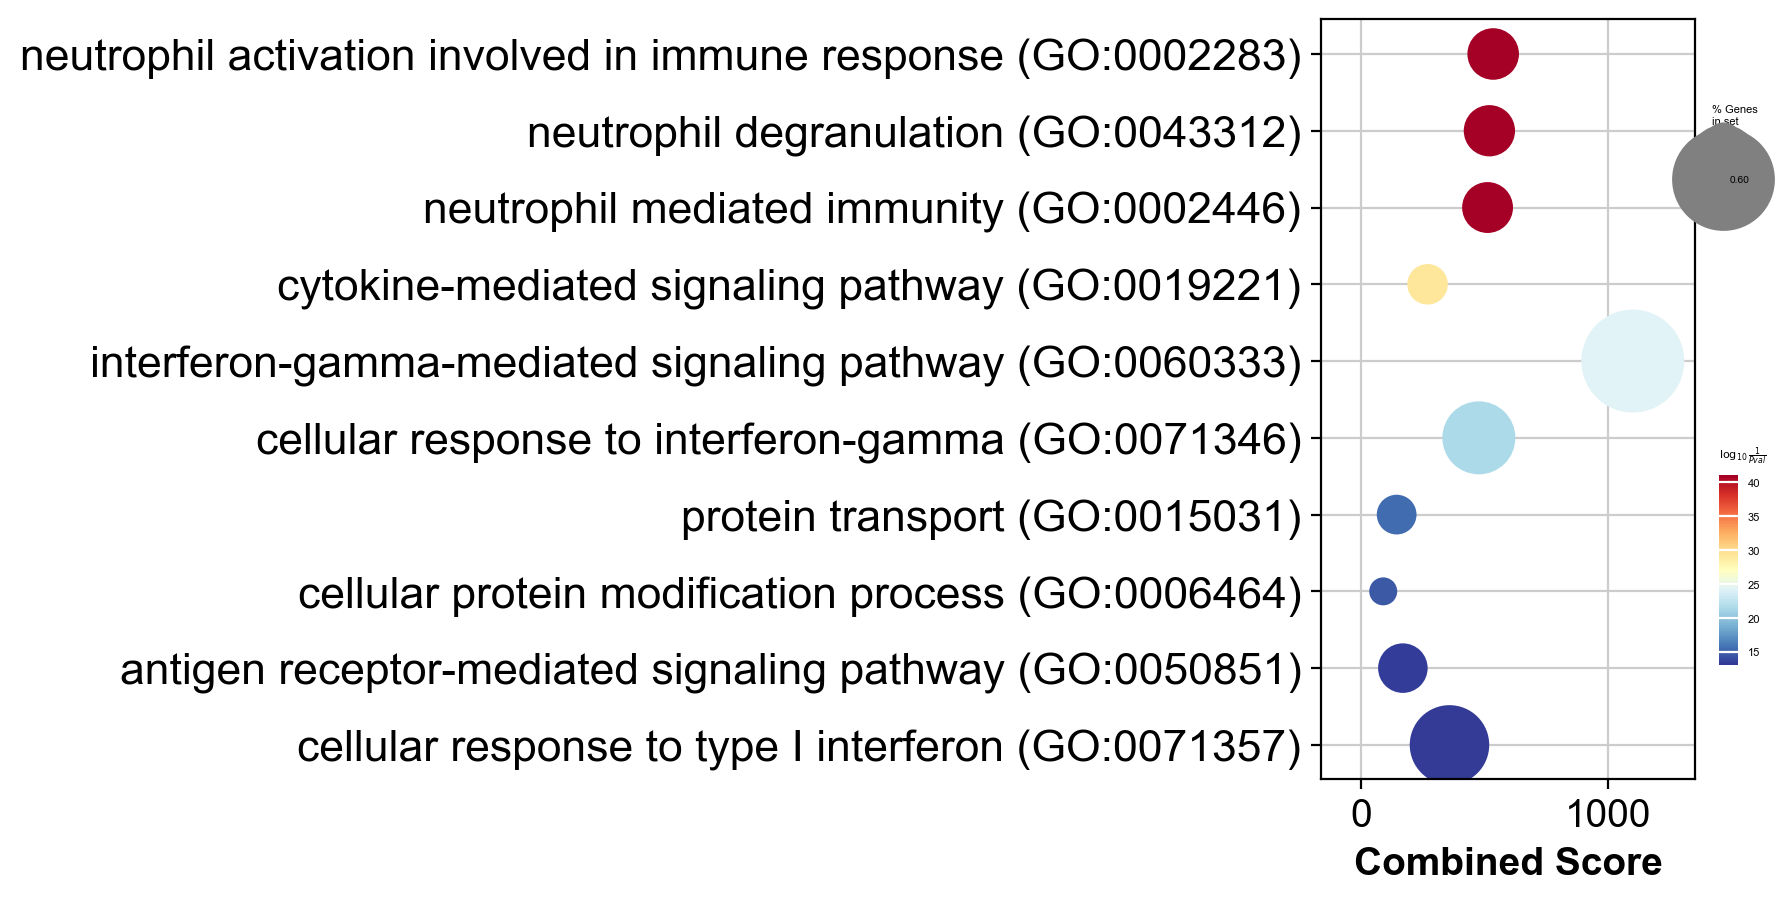

In [10]:
import gseapy as gp

#Available databases : ‘Human’, ‘Mouse’, ‘Yeast’, ‘Fly’, ‘Fish’, ‘Worm’ 
gene_set_names = gp.get_library_name(organism='Human')
print(gene_set_names)


enr_res = gp.enrichr(gene_list=glist_up,
                     organism='Human',
                     gene_sets='GO_Biological_Process_2021',
                     #description='pathway',
                     cutoff = 0.5)

enr_res.results.head()

gp.dotplot(enr_res.res2d, title='',cmap='RdYlBu_r', size=10, figsize=(3,5), cutoff = 0.5) #cmap='viridis_r'

plt.savefig('glist_up GO_Biological.pdf')

# MONO DEG M3 VS THE REST (Crisis)

c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


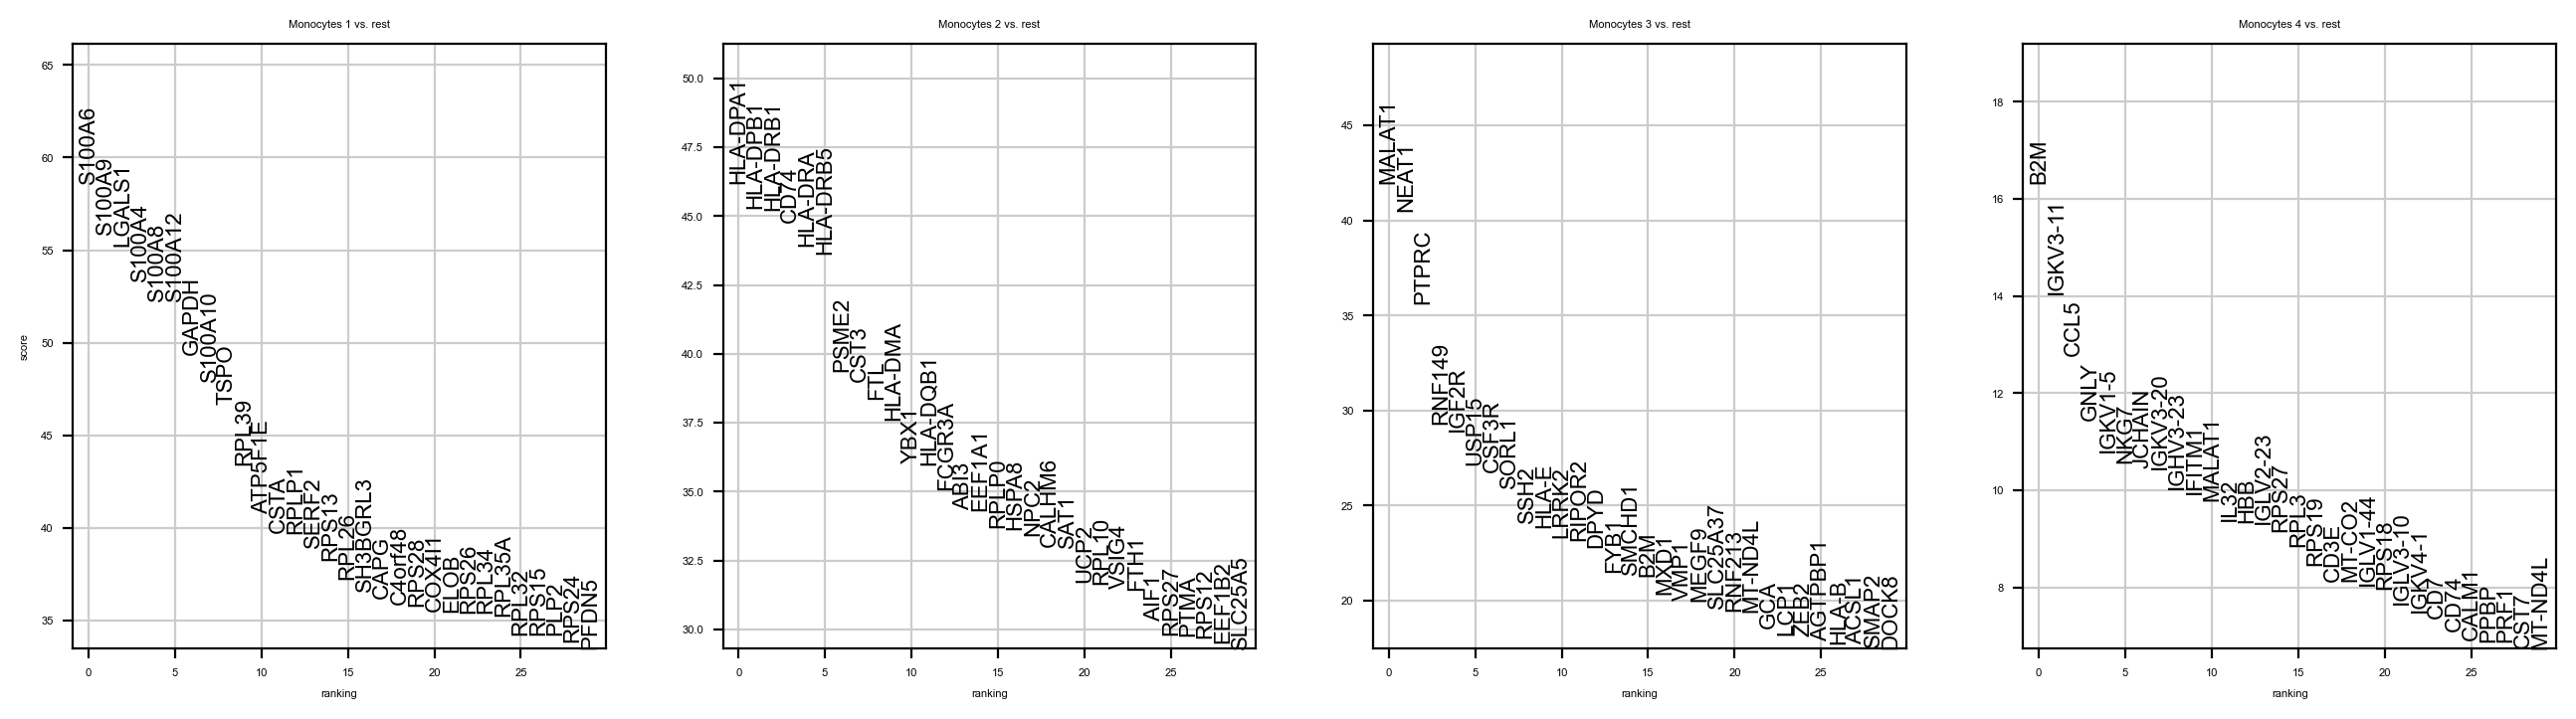

In [32]:
sc.tl.rank_genes_groups(adata_MC_M_MC, 'Minor_cluster', method='wilcoxon', key_added = "wilcoxon")
sc.pl.rank_genes_groups(adata_MC_M_MC, n_genes=30, sharey=False, key="wilcoxon")

In [34]:
Crisis_genes = sc.get.rank_genes_groups_df(adata_MC_M_MC, group='Monocytes 3', key='wilcoxon')
Crisis_genes = Crisis_genes[(Crisis_genes.pvals_adj < 0.05) & (abs(Crisis_genes.logfoldchanges) > 0.5)].sort_values(by=['logfoldchanges'], ascending=False).reset_index(drop=True)

Crisis_genes_up = Crisis_genes[(Crisis_genes.pvals_adj < 0.05) & (Crisis_genes.logfoldchanges > 0.5)].sort_values(by=['scores'], ascending=False).reset_index(drop=True)
Crisis_genes_down = Crisis_genes[(Crisis_genes.pvals_adj < 0.05) & (Crisis_genes.logfoldchanges < -0.5)].sort_values(by=['scores'], ascending=False).reset_index(drop=True)

glist_up = Crisis_genes_up['names'].squeeze().str.strip().tolist()
glist_down = Crisis_genes_down['names'].squeeze().str.strip().tolist()
glist_all = glist_up + glist_down

print(f'glist_up: {len(glist_up)}, glist_down: {len(glist_down)}, glist_all: {len(glist_all)}')

Crisis_genes.to_csv('./write/M3_DEG_M3_vs_Mrest.csv', index=False)

glist_up: 1014, glist_down: 2203, glist_all: 3217


# Mono RNA-velocity

In [ ]:
scv.set_figure_params(dpi=200, figsize=[5,5], color_map='viridis') #

In [37]:
# Sevelo default model

import scvelo as scv

scv.pp.moments(adata_MC_M, n_pcs=30, n_neighbors=30)
scv.tl.velocity(adata_MC_M, n_jobs=12)
scv.tl.velocity_graph(adata_MC_M, n_jobs=12)

Normalized count data: spliced, unspliced.
computing neighbors
    finished (0:00:15) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:05) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:26) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 12/16 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:00:25) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


figure cannot be saved as pdf, using png instead.
saving figure to file ./figs/scvelo_mono.png


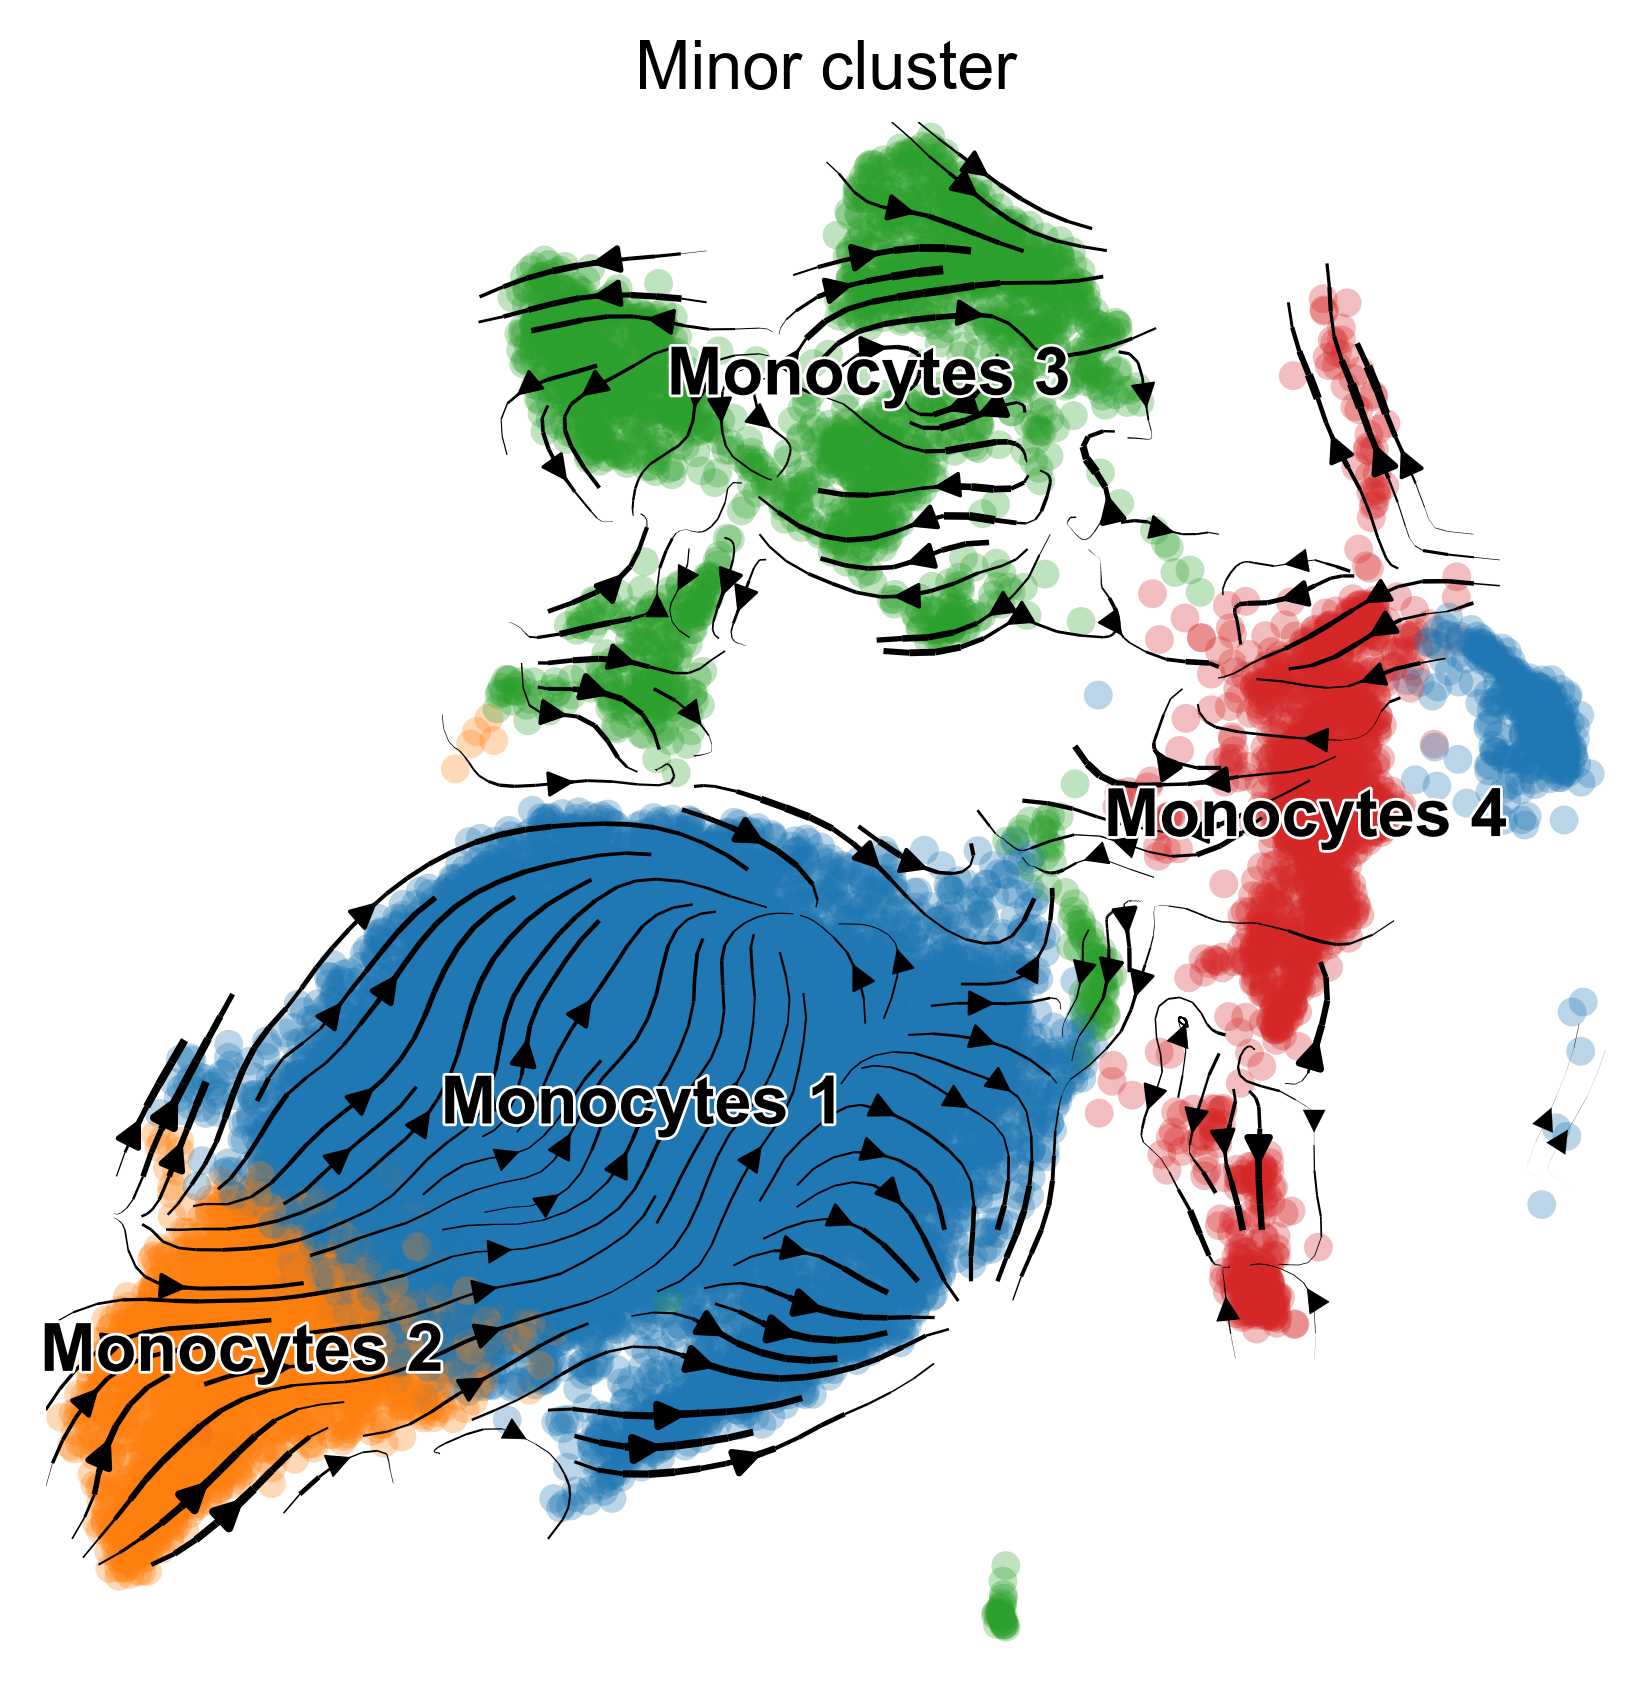

In [39]:
scv.set_figure_params(dpi=200, figsize=[5,5], color_map='viridis') #
scv.pl.velocity_embedding_stream(adata_MC_M, basis='umap', figsize=(5,5), save= './figs/scvelo_mono.pdf', color='Minor_cluster', color_map='viridis')